In [35]:
import xarray as xr
import numpy as np
import glob
import os

In [3]:
phase='calval_phase' # calval_phase or science_phase
simu='eNATL60-BLB002' # or eNATL60-BLBT02
data='karin' # or nadir

In [11]:
#parameters for the region to consider
reg='NANFL'
latmin=30
latmax=40
lonmin=-55+360
lonmax=-40+360


In [5]:
tdir='/work/ALT/swot/aval/wisa/tmp/inland_cleaning/swot_simulator_'+phase+'/'+simu+'-SSH-1h/'+data
files=glob.glob(tdir+'/*/*nc')

In [6]:
def check_data_region(file,latmin,latmax,lonmin,lonmax):
    ds=xr.open_dataset(file)
    latfile=ds.latitude
    lonfile=ds.longitude
    ind_region=np.where((latfile < latmax) & (latfile > latmin) & 
        (lonfile < lonmax) & (lonfile > lonmin))
    if len(ind_region[0]) > 0:
 #       print(file+' has data relevant to the region selected')
        check=1
    else:
        check=0
    return check,ind_region
    

In [7]:
def check_data_nonan(file,ind_region):
    ds=xr.open_dataset(file)
    latfile=ds.latitude
    lonfile=ds.longitude
    ssh=ds.ssh_karin    
    numlines_region=ind_region[0]
    numlines_region_unique=np.unique(numlines_region)
    for k in np.arange(len(numlines_region_unique)):
        isdata=np.where(np.isnan(ssh[numlines_region_unique[k],:])==False)
        if len(isdata[0])>0:
#            print(file+' has non NaN data')
            check=1
        else:
            check=0
        return check,isdata


In [12]:
file='/work/ALT/swot/aval/wisa/tmp/inland_cleaning/swot_simulator_calval_phase/eNATL60-BLB002-SSH-1h/karin/2010/SWOT_L2_LR_SSH_Basic_341_011_20100603T042122_20100603T051228_DG10_01.nc'
check, ind_region = check_data_region(file,latmin,latmax,lonmin,lonmax)


In [14]:
check2,isdata = check_data_nonan(file,ind_region)

/work/ALT/swot/aval/wisa/tmp/inland_cleaning/swot_simulator_calval_phase/eNATL60-BLB002-SSH-1h/karin/2010/SWOT_L2_LR_SSH_Basic_341_011_20100603T042122_20100603T051228_DG10_01.nc has non NaN data


In [15]:
print(check2)

1


In [16]:
isdata

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
        65]),)

In [18]:
ds=xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:                (num_lines: 9868, num_pixels: 71)
Coordinates:
    latitude               (num_lines, num_pixels) float64 ...
    longitude              (num_lines, num_pixels) float64 ...
Dimensions without coordinates: num_lines, num_pixels
Data variables:
    time                   (num_lines) datetime64[ns] ...
    ssh_karin              (num_lines, num_pixels) float64 ...
    err_phase              (num_lines, num_pixels) float64 ...
    err_wet_troposphere    (num_lines, num_pixels) float64 ...
    err_roll               (num_lines, num_pixels) float64 ...
    err_timing             (num_lines, num_pixels) float64 ...
    err_karin              (num_lines, num_pixels) float64 ...
    ssh_karin_true         (num_lines, num_pixels) float64 ...
    err_baseline_dilation  (num_lines, num_pixels) float64 ...
Attributes:
    Conventions:                        CF-1.7
    title:                              Level 2 Low Rate Sea Surface Height D...
    institution:                        CNES/JPL
    source:                             Simulate product
    history:                            2020-07-23 11:24:42 : Creation
    platform:                           SWOT
    references:                         Gaultier, L., C. Ubelmann, and L.-L. ...
    reference_document:                 D-56407_SWOT_Product_Description_L2_L...
    contact:                            CNES aviso@altimetry.fr, JPL podaac@p...
    cycle_number:                       341
    pass_number:                        11
    time_coverage_start:                2010-06-03T04:21:22.443817Z
    time_coverage_end:                  2010-06-03T05:12:28.037054Z
    time_coverage_duration:             P51M5S
    time_coverage_resolution:           P1S
    geospatial_lon_min:                 0.0004177715185490845
    geospatial_lon_max:                 359.99990311987733
    geospatial_lat_min:                 -78.29180400220362
    geospatial_lat_max:                 78.29230999607833
    left_first_longitude:               221.87992847033166
    left_first_latitude:                -78.29180400220362
    left_last_longitude:                29.008258972514415
    left_last_latitude:                 77.03326000364758
    right_first_longitude:              221.87102950312362
    right_first_latitude:               -77.03275524812338
    right_last_longitude:               29.01153278903159
    right_last_latitude:                78.29230999607833
    wavelength:                         0.008385803020979
    orbit_solution:                     POE
    xref_input_l1b_lr_intf_file:        N/A
    xref_input_static_karin_cal_file:   N/A
    xref_input_static_geophys_files:    N/A
    xref_input_dynamic_geophys_files:   N/A
    xref_input_l1_nalt_gdr_files:       N/A
    xref_input_int_lr_xover_cal_files:  N/A
    xref_input_l2_rad_gdr_files:        N/A
    ellipsoid_semi_major_axis:          1.0
    ellipsoid_flattening:               0.0

In [20]:
ds_regnonan=ds.isel(num_lines=isdata[0])

In [21]:
ds_regnonan

<xarray.Dataset>
Dimensions:                (num_lines: 52, num_pixels: 71)
Coordinates:
    latitude               (num_lines, num_pixels) float64 ...
    longitude              (num_lines, num_pixels) float64 ...
Dimensions without coordinates: num_lines, num_pixels
Data variables:
    time                   (num_lines) datetime64[ns] 2010-06-03T04:21:24.011...
    ssh_karin              (num_lines, num_pixels) float64 ...
    err_phase              (num_lines, num_pixels) float64 ...
    err_wet_troposphere    (num_lines, num_pixels) float64 ...
    err_roll               (num_lines, num_pixels) float64 ...
    err_timing             (num_lines, num_pixels) float64 ...
    err_karin              (num_lines, num_pixels) float64 ...
    ssh_karin_true         (num_lines, num_pixels) float64 ...
    err_baseline_dilation  (num_lines, num_pixels) float64 ...
Attributes:
    Conventions:                        CF-1.7
    title:                              Level 2 Low Rate Sea Surface Height D...
    institution:                        CNES/JPL
    source:                             Simulate product
    history:                            2020-07-23 11:24:42 : Creation
    platform:                           SWOT
    references:                         Gaultier, L., C. Ubelmann, and L.-L. ...
    reference_document:                 D-56407_SWOT_Product_Description_L2_L...
    contact:                            CNES aviso@altimetry.fr, JPL podaac@p...
    cycle_number:                       341
    pass_number:                        11
    time_coverage_start:                2010-06-03T04:21:22.443817Z
    time_coverage_end:                  2010-06-03T05:12:28.037054Z
    time_coverage_duration:             P51M5S
    time_coverage_resolution:           P1S
    geospatial_lon_min:                 0.0004177715185490845
    geospatial_lon_max:                 359.99990311987733
    geospatial_lat_min:                 -78.29180400220362
    geospatial_lat_max:                 78.29230999607833
    left_first_longitude:               221.87992847033166
    left_first_latitude:                -78.29180400220362
    left_last_longitude:                29.008258972514415
    left_last_latitude:                 77.03326000364758
    right_first_longitude:              221.87102950312362
    right_first_latitude:               -77.03275524812338
    right_last_longitude:               29.01153278903159
    right_last_latitude:                78.29230999607833
    wavelength:                         0.008385803020979
    orbit_solution:                     POE
    xref_input_l1b_lr_intf_file:        N/A
    xref_input_static_karin_cal_file:   N/A
    xref_input_static_geophys_files:    N/A
    xref_input_dynamic_geophys_files:   N/A
    xref_input_l1_nalt_gdr_files:       N/A
    xref_input_int_lr_xover_cal_files:  N/A
    xref_input_l2_rad_gdr_files:        N/A
    ellipsoid_semi_major_axis:          1.0
    ellipsoid_flattening:               0.0

In [24]:
try:
    ds_regnonan_all=xr.concat([ds_regnonan_all,ds_regnonan],dim='N_PROF')
except NameError:
    ds_regnonan_all=ds_regnonan

In [25]:
file='/work/ALT/swot/aval/wisa/tmp/inland_cleaning/swot_simulator_calval_phase/eNATL60-BLB002-SSH-1h/karin/2010/SWOT_L2_LR_SSH_Basic_374_024_20100706T101600_20100706T110705_DG10_01.nc'
check, ind_region = check_data_region(file,latmin,latmax,lonmin,lonmax)
check2,isdata = check_data_nonan(file,ind_region)
ds=xr.open_dataset(file)
ds_regnonan=ds.isel(num_lines=isdata[0])
try:
    ds_regnonan_all=xr.concat([ds_regnonan_all,ds_regnonan],dim='num_lines')
except NameError:
    ds_regnonan_all=ds_regnonan

/work/ALT/swot/aval/wisa/tmp/inland_cleaning/swot_simulator_calval_phase/eNATL60-BLB002-SSH-1h/karin/2010/SWOT_L2_LR_SSH_Basic_374_024_20100706T101600_20100706T110705_DG10_01.nc has non NaN data


In [46]:
ind_region_unique=np.unique(ind_region[0])

In [48]:
ind_region_unique[isdata[0]]

array([2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683,
       2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694,
       2695, 2696, 2697, 2698, 2708, 2709, 2710, 2711, 2712, 2713, 2714,
       2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725,
       2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733])

In [49]:
ds_regnonan=ds.isel(num_lines=ind_region_unique[isdata[0]])


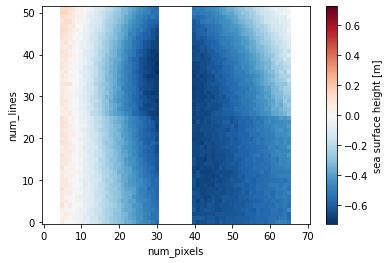

In [51]:
ds_regnonan.ssh_karin.plot()

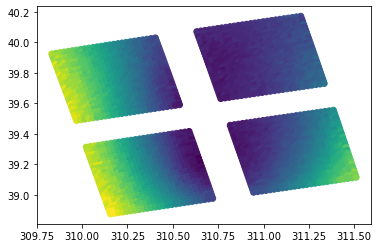

In [52]:
import matplotlib.pyplot as plt
plt.scatter(ds_regnonan.longitude, ds_regnonan.latitude,c=ds_regnonan.ssh_karin)

In [36]:
nfile=file.split('/')[-1]
odir='/work/ALT/odatis/eNATL60/alberta/SWOT-sim/'+reg+'/'+phase+'/'
if not os.path.exists(odir):
    os.makedirs(odir)
filename=odir+nfile

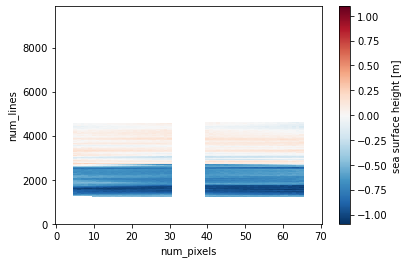

In [43]:
ds.ssh_karin.plot()

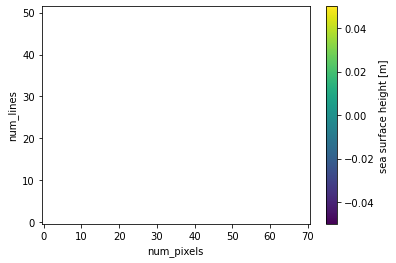

In [42]:
ds_regnonan.ssh_karin.plot()

In [37]:
ds_regnonan.to_netcdf(path=filename,mode='w')

In [33]:
print(filename)

/work/ALT/odatis/eNATL60/alberta/SWOT-sim/calval_phase/SWOT_L2_LR_SSH_Basic_374_024_20100706T101600_20100706T110705_DG10_01.nc


In [38]:
dst=xr.open_dataset(filename)

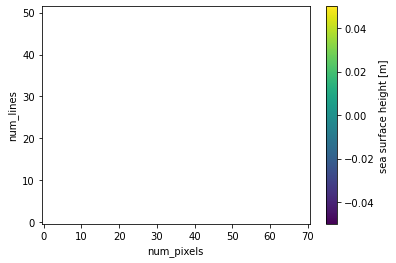

In [41]:
dst.ssh_karin.plot()

In [28]:
isdata

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
        65]),)

In [26]:
ds_regnonan_all

<xarray.Dataset>
Dimensions:                (num_lines: 104, num_pixels: 71)
Coordinates:
    latitude               (num_lines, num_pixels) float64 -78.29 ... 78.23
    longitude              (num_lines, num_pixels) float64 222.3 222.3 ... 240.4
Dimensions without coordinates: num_lines, num_pixels
Data variables:
    time                   (num_lines) datetime64[ns] 2010-06-03T04:21:24.011...
    ssh_karin              (num_lines, num_pixels) float64 nan nan ... nan nan
    err_phase              (num_lines, num_pixels) float64 nan nan ... nan nan
    err_wet_troposphere    (num_lines, num_pixels) float64 nan nan ... nan nan
    err_roll               (num_lines, num_pixels) float64 nan nan ... nan nan
    err_timing             (num_lines, num_pixels) float64 nan nan ... nan nan
    err_karin              (num_lines, num_pixels) float64 nan nan ... nan nan
    ssh_karin_true         (num_lines, num_pixels) float64 nan nan ... nan nan
    err_baseline_dilation  (num_lines, num_pixels) float64 nan nan ... nan nan
Attributes:
    Conventions:                        CF-1.7
    title:                              Level 2 Low Rate Sea Surface Height D...
    institution:                        CNES/JPL
    source:                             Simulate product
    history:                            2020-07-23 11:24:42 : Creation
    platform:                           SWOT
    references:                         Gaultier, L., C. Ubelmann, and L.-L. ...
    reference_document:                 D-56407_SWOT_Product_Description_L2_L...
    contact:                            CNES aviso@altimetry.fr, JPL podaac@p...
    cycle_number:                       341
    pass_number:                        11
    time_coverage_start:                2010-06-03T04:21:22.443817Z
    time_coverage_end:                  2010-06-03T05:12:28.037054Z
    time_coverage_duration:             P51M5S
    time_coverage_resolution:           P1S
    geospatial_lon_min:                 0.0004177715185490845
    geospatial_lon_max:                 359.99990311987733
    geospatial_lat_min:                 -78.29180400220362
    geospatial_lat_max:                 78.29230999607833
    left_first_longitude:               221.87992847033166
    left_first_latitude:                -78.29180400220362
    left_last_longitude:                29.008258972514415
    left_last_latitude:                 77.03326000364758
    right_first_longitude:              221.87102950312362
    right_first_latitude:               -77.03275524812338
    right_last_longitude:               29.01153278903159
    right_last_latitude:                78.29230999607833
    wavelength:                         0.008385803020979
    orbit_solution:                     POE
    xref_input_l1b_lr_intf_file:        N/A
    xref_input_static_karin_cal_file:   N/A
    xref_input_static_geophys_files:    N/A
    xref_input_dynamic_geophys_files:   N/A
    xref_input_l1_nalt_gdr_files:       N/A
    xref_input_int_lr_xover_cal_files:  N/A
    xref_input_l2_rad_gdr_files:        N/A
    ellipsoid_semi_major_axis:          1.0
    ellipsoid_flattening:               0.0

In [29]:
ds_regnonan_all.time

<xarray.DataArray 'time' (num_lines: 104)>
array(['2010-06-03T04:21:24.011726976', '2010-06-03T04:21:24.325312960',
       '2010-06-03T04:21:24.638899968', '2010-06-03T04:21:24.952488960',
       '2010-06-03T04:21:25.266079936', '2010-06-03T04:21:25.579672000',
       '2010-06-03T04:21:25.893265984', '2010-06-03T04:21:26.206860928',
       '2010-06-03T04:21:26.520457984', '2010-06-03T04:21:26.834057984',
       '2010-06-03T04:21:27.147657984', '2010-06-03T04:21:27.461260992',
       '2010-06-03T04:21:27.774867008', '2010-06-03T04:21:28.088472960',
       '2010-06-03T04:21:28.402083008', '2010-06-03T04:21:28.715694976',
       '2010-06-03T04:21:29.029307968', '2010-06-03T04:21:29.342924992',
       '2010-06-03T04:21:29.656542976', '2010-06-03T04:21:29.970164032',
       '2010-06-03T04:21:30.283787968', '2010-06-03T04:21:30.597413952',
       '2010-06-03T04:21:30.911043008', '2010-06-03T04:21:31.224675008',
       '2010-06-03T04:21:31.538308992', '2010-06-03T04:21:31.851947008',
       '2010-06-03T04:21:34.988206976', '2010-06-03T04:21:35.301817984',
       '2010-06-03T04:21:35.615428992', '2010-06-03T04:21:35.929035968',
       '2010-06-03T04:21:36.242640960', '2010-06-03T04:21:36.556243968',
       '2010-06-03T04:21:36.869844992', '2010-06-03T04:21:37.183443968',
       '2010-06-03T04:21:37.497040960', '2010-06-03T04:21:37.810635968',
       '2010-06-03T04:21:38.124228992', '2010-06-03T04:21:38.437820992',
       '2010-06-03T04:21:38.751409984', '2010-06-03T04:21:39.064998976',
...
       '2010-07-06T10:16:06.490508992', '2010-07-06T10:16:06.802753984',
       '2010-07-06T10:16:07.114998976', '2010-07-06T10:16:07.427243008',
       '2010-07-06T10:16:07.739484992', '2010-07-06T10:16:08.051726976',
       '2010-07-06T10:16:08.363968000', '2010-07-06T10:16:08.676207936',
       '2010-07-06T10:16:08.988447040', '2010-07-06T10:16:09.300686016',
       '2010-07-06T10:16:09.612923968', '2010-07-06T10:16:09.925161024',
       '2010-07-06T10:16:13.047518976', '2010-07-06T10:16:13.359753984',
       '2010-07-06T10:16:13.671988992', '2010-07-06T10:16:13.984224960',
       '2010-07-06T10:16:14.296460992', '2010-07-06T10:16:14.608697984',
       '2010-07-06T10:16:14.920933952', '2010-07-06T10:16:15.233171968',
       '2010-07-06T10:16:15.545409984', '2010-07-06T10:16:15.857647936',
       '2010-07-06T10:16:16.169886976', '2010-07-06T10:16:16.482127040',
       '2010-07-06T10:16:16.794368000', '2010-07-06T10:16:17.106608960',
       '2010-07-06T10:16:17.418851968', '2010-07-06T10:16:17.731094976',
       '2010-07-06T10:16:18.043339968', '2010-07-06T10:16:18.355584960',
       '2010-07-06T10:16:18.667831936', '2010-07-06T10:16:18.980080000',
       '2010-07-06T10:16:19.292329024', '2010-07-06T10:16:19.604579968',
       '2010-07-06T10:16:19.916832000', '2010-07-06T10:16:20.229084992',
       '2010-07-06T10:16:20.541339968', '2010-07-06T10:16:20.853596992'],
      dtype='datetime64[ns]')
Dimensions without coordinates: num_lines
Attributes:
    long_name:           time in UTC
    standard_name:       time
    tai_utc_difference:  [Value of TAI-UTC at time of first record]
    leap_second:         YYYY-MM-DD hh:mm:ss
    comment:             Time of measurement in seconds in the UTC time scale...

In [ ]:
for f in np.arange(len(files)):
    file=files[f]
    check, ind_region = check_data_region(file,latmin,latmax,lonmin,lonmax)
    if check == 1:
        check2,isdata = check_data_nonan(file,ind_region)
        if check2 == 1:
            print('extract data for file '+file)
            ds_one=ds_profiles.isel(N_PROF=nprof)
